<a href="https://colab.research.google.com/github/Dhaneshkp/DesktopAssistant/blob/main/GAMvsSVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 8.8 MB/s eta 0:00:00


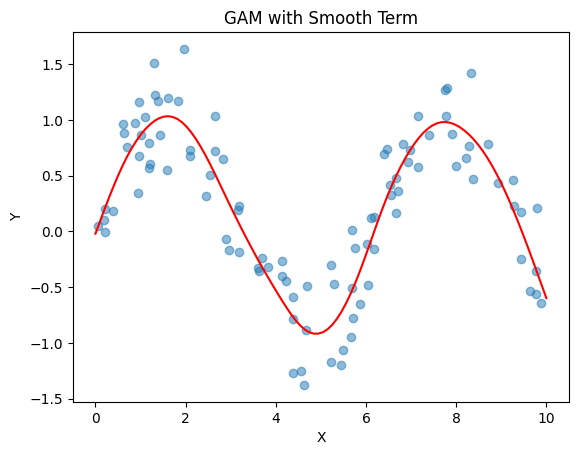

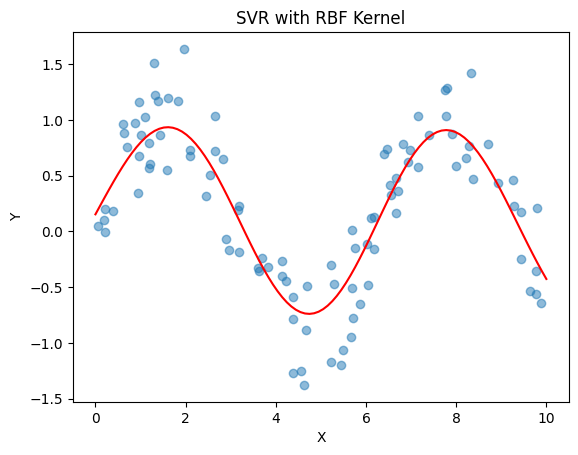

In [ ]:
!pip install pygam
import numpy as np
import matplotlib.pyplot as plt
from pygam import LinearGAM, s

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 100 observations of a single predictor
y = np.sin(X).ravel() + np.random.normal(0, 0.3, 100)  # Non-linear relationship with noise

# Fit the GAM model
gam = LinearGAM(s(0)).fit(X, y)

# Generate predictions
XX = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = gam.predict(XX)

# Plot the smooth term
plt.scatter(X, y, alpha=0.5)
plt.plot(XX, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('GAM with Smooth Term')
plt.show()

from sklearn.svm import SVR

# Fit the SVR model with RBF kernel
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X, y)

# Generate predictions
y_svr_pred = svr.predict(XX)

# Plot the SVR results
plt.scatter(X, y, alpha=0.5)
plt.plot(XX, y_svr_pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('SVR with RBF Kernel')
plt.show()


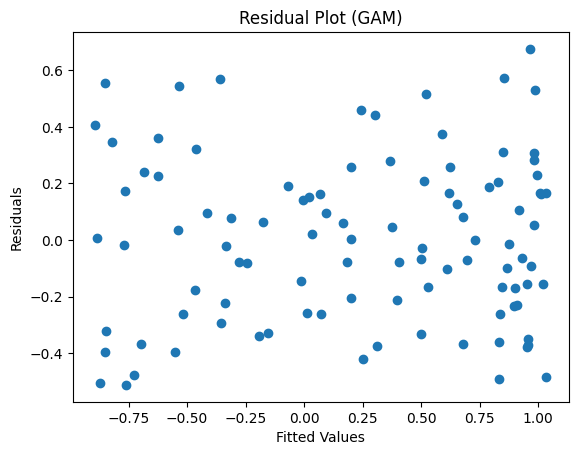

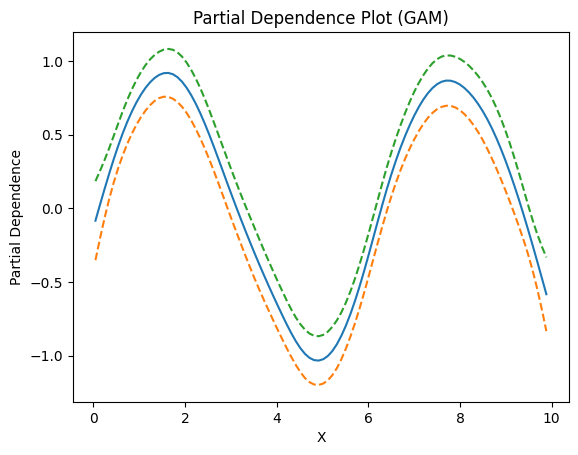

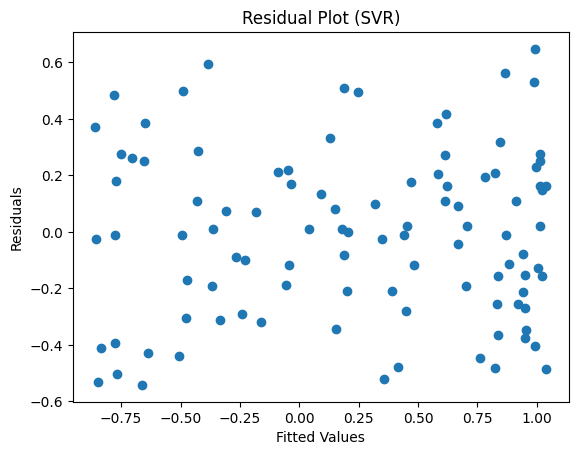

Best SVR hyperparameters: {'C': 10, 'epsilon': 0.01}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pygam import LinearGAM, s
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# ... (generate data as before) ...

# Fit the GAM model
gam = LinearGAM(s(0)).fit(X, y)

# Diagnostics for GAM
# Residual analysis
residuals = y - gam.predict(X)
plt.scatter(gam.predict(X), residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (GAM)")
plt.show()

# Partial dependence plot
XX = gam.generate_X_grid(term=0)
pdep, confi = gam.partial_dependence(term=0, X=XX, width=.95)
plt.plot(XX, pdep)
plt.plot(XX, confi, linestyle='--')
plt.xlabel("X")
plt.ylabel("Partial Dependence")
plt.title("Partial Dependence Plot (GAM)")
plt.show()

# Fit the SVR model with RBF kernel
param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}
svr = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
svr.fit(X, y)

# Diagnostics for SVR
# Residual analysis
residuals_svr = y - svr.predict(X)
plt.scatter(svr.predict(X), residuals_svr)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (SVR)")
plt.show()

# Print best hyperparameters
print("Best SVR hyperparameters:", svr.best_params_)

# ... (generate predictions and plots as before) ...